<a href="https://colab.research.google.com/github/MassGH2023/Deep-Learning-and-Neural-Network/blob/main/TF_binary_classifications_cat_dog_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import zipfile
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [4]:
model = Sequential()

model.add(Dense(3, activation = 'sigmoid', input_dim = 2))
model.add(Dense(1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# We will use the dataset from https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip for this work
# Dataset has been derived into training and validation pieces already . Hence we nedd to keep those datasets in two separete folders.

!wget --no-check-certificate \
"https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip" \
-O "/tmp/cats-and-dogs-raw.zip"

local_zip = '/tmp/cats-and-dogs-raw.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2025-02-07 21:16:38--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.207, 142.251.31.207, 142.251.18.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats-and-dogs-raw.zip’

/tmp/cats-and-dogs- 100%[===================>]  65.43M  27.5MB/s    in 2.4s    

2025-02-07 21:16:41 (27.5 MB/s) - ‘/tmp/cats-and-dogs-raw.zip’ saved [68606236/68606236]



In [49]:
print(zip_ref.namelist())

['cats_and_dogs_filtered/', 'cats_and_dogs_filtered/vectorize.py', 'cats_and_dogs_filtered/validation/', 'cats_and_dogs_filtered/train/', 'cats_and_dogs_filtered/validation/dogs/', 'cats_and_dogs_filtered/validation/dogs/dog.2127.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2126.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2125.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2124.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2123.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2122.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2121.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2120.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2119.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2118.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2117.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2116.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2115.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2114.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2113.

In [53]:
print(os.listdir('/tmp/cats_and_dogs_filtered'))

['train', 'vectorize.py', 'validation']


The os.path.join() method is a function in the os module that joins one or more path components intelligently. It constructs a full path by concatenating various components while automatically inserting the appropriate path separator (/ for Unix-based systems and \ for Windows).

In [6]:
  #Create separate train and validation directory as the structure has been followed in the original dataset.

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

#Type your code below to check out number of cat and dog images in train and validation folder

print("Number of cat images in train folder:",len(os.listdir(train_cats_dir)))
print("Number of dog images in train folder:",len(os.listdir(train_dogs_dir)))
print("Number of cat images in validation folder:", len(os.listdir(test_cats_dir)))
print("Number of dog images in validation folder:", len(os.listdir(test_dogs_dir)))

Number of cat images in train folder: 1000
Number of dog images in train folder: 1000
Number of cat images in validation folder: 500
Number of dog images in validation folder: 500


In [57]:
train_dir

'/tmp/cats_and_dogs_filtered/train'

In [48]:
contents = os.listdir(train_dir)
print("Contents of train_dir:", contents)

Contents of train_dir: ['cats', 'dogs']


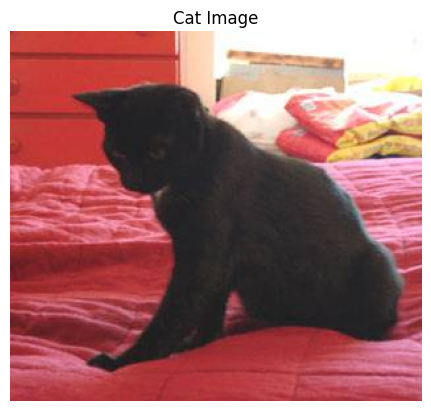

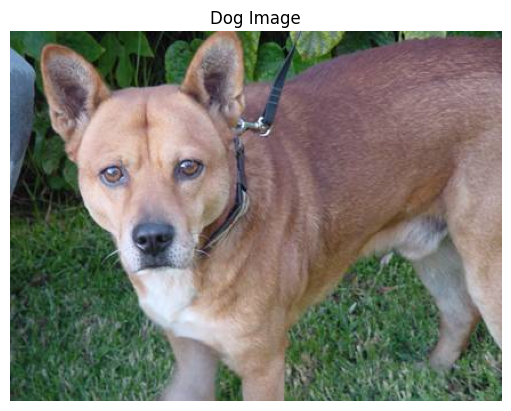

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the first cat image
cat_image_path = os.path.join(train_cats_dir, os.listdir(train_cats_dir)[500])
img = mpimg.imread(cat_image_path)
plt.imshow(img)
plt.title("Cat Image")
plt.axis('off')  # Hide axes
plt.show()

# Display the first dog image
dog_image_path = os.path.join(train_dogs_dir, os.listdir(train_dogs_dir)[0])
img = mpimg.imread(dog_image_path)
plt.imshow(img)
plt.title("Dog Image")
plt.axis('off')  # Hide axes
plt.show()

In [58]:
cat_image_path

'/tmp/cats_and_dogs_filtered/train/cats/cat.171.jpg'

In [15]:
# List first 5 cat images in train_cats_dir
cat_images = os.listdir(train_cats_dir)[:5]
print("First 5 cat images:", cat_images)

# List first 5 dog images in train_dogs_dir
dog_images = os.listdir(train_dogs_dir)[:5]
print("First 5 dog images:", dog_images)

First 5 cat images: ['cat.492.jpg', 'cat.978.jpg', 'cat.815.jpg', 'cat.537.jpg', 'cat.587.jpg']
First 5 dog images: ['dog.622.jpg', 'dog.876.jpg', 'dog.479.jpg', 'dog.80.jpg', 'dog.497.jpg']


In [17]:
from PIL import Image
import os

# Path to the directory containing images
train_cats_dir = os.path.join(train_dir, 'cats')

# Get the first image in the directory
first_image_path = os.path.join(train_cats_dir, os.listdir(train_cats_dir)[0])

# Open the image and check its size
with Image.open(first_image_path) as img:
    width, height = img.size
    print(f"Image: {first_image_path}")
    print(f"Size: {width}x{height} pixels and size is {img.size}")

Image: /tmp/cats_and_dogs_filtered/train/cats/cat.492.jpg
Size: 288x251 pixels and size is (288, 251)


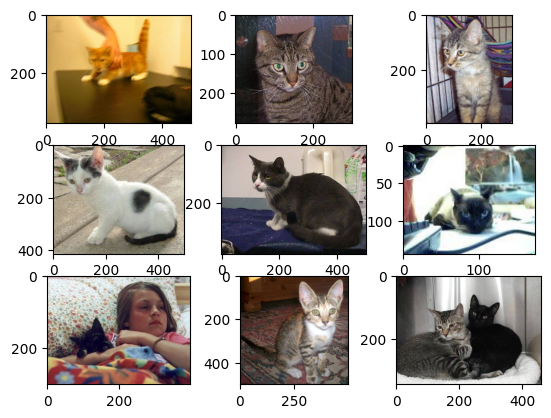

In [24]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = os.path.join(base_dir, train_cats_dir)

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)

    # define filename
    filename = folder + '/cat.' + str(i) + '.jpg' #change the file name to switch between cat and dog images

    # load image pixels
    image = imread(filename)

    # plot raw pixel data
    pyplot.imshow(image)

# show the figure
pyplot.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'

)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'

)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [59]:
train_dir

'/tmp/cats_and_dogs_filtered/train'

In [21]:
from tensorflow.keras.optimizers import RMSprop

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(64, input_shape = [150,150,3], kernel_size= (3,3), activation= 'relu'),
                               tf.keras.layers.MaxPool2D(pool_size = (2,2)),


                               tf.keras.layers.Conv2D(128, kernel_size= (3,3), activation= 'relu'),
                               tf.keras.layers.MaxPool2D(pool_size = (2,2)),

                               tf.keras.layers.Flatten(),

                               tf.keras.layers.Dense(256, activation= 'relu'),

                               tf.keras.layers.Dense(1, activation= 'sigmoid')

                               ])



model_1.summary()

model_1.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate = 1e-4), metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 165888)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │      42,467,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,543,489 (162.29 MB)

 Trainable params: 42,543,489 (162.29 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [26]:
# Get one batch of data
X_batch, y_batch = next(train_generator)

# Check the shape of X and y
print("X_batch shape:", X_batch.shape)  # (batch_size, height, width, channels)
print("y_batch shape:", y_batch.shape)  # (batch_size,) for binary, (batch_size, num_classes) for categorical

X_batch shape: (20, 150, 150, 3)
y_batch shape: (20,)


In [23]:
train_model = model_1.fit(train_generator, steps_per_epoch = 100, epochs= 25, validation_data= validation_generator,
                          validation_steps = 50,
                          verbose = 2)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 11s - 114ms/step - accuracy: 0.5405 - loss: 0.7079 - val_accuracy: 0.5560 - val_loss: 0.6728
Epoch 2/25
100/100 - 15s - 149ms/step - accuracy: 0.6055 - loss: 0.6584 - val_accuracy: 0.5850 - val_loss: 0.6639
Epoch 3/25
100/100 - 6s - 58ms/step - accuracy: 0.6565 - loss: 0.6179 - val_accuracy: 0.6310 - val_loss: 0.6189
Epoch 4/25
100/100 - 9s - 92ms/step - accuracy: 0.7110 - loss: 0.5785 - val_accuracy: 0.6820 - val_loss: 0.5933
Epoch 5/25
100/100 - 5s - 54ms/step - accuracy: 0.7425 - loss: 0.5428 - val_accuracy: 0.6810 - val_loss: 0.6041
Epoch 6/25
100/100 - 11s - 108ms/step - accuracy: 0.7620 - loss: 0.5068 - val_accuracy: 0.6210 - val_loss: 0.6290
Epoch 7/25
100/100 - 9s - 91ms/step - accuracy: 0.7895 - loss: 0.4716 - val_accuracy: 0.7140 - val_loss: 0.5609
Epoch 8/25
100/100 - 7s - 67ms/step - accuracy: 0.8090 - loss: 0.4324 - val_accuracy: 0.7190 - val_loss: 0.5568
Epoch 9/25
100/100 - 10s - 98ms/step - accuracy: 0.8330 - loss: 0.3982 - val_accuracy: 0.7260 - val_loss: 0.5

In [28]:
train_model.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
modhist = train_model.history
len(modhist['accuracy'])

25

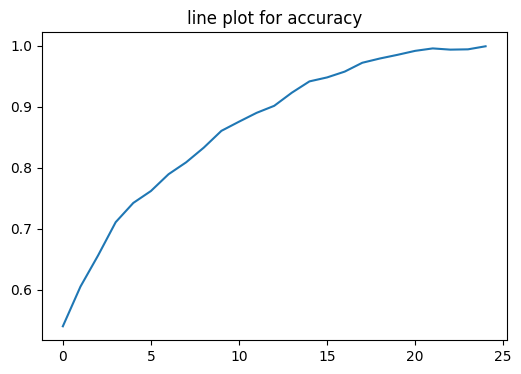

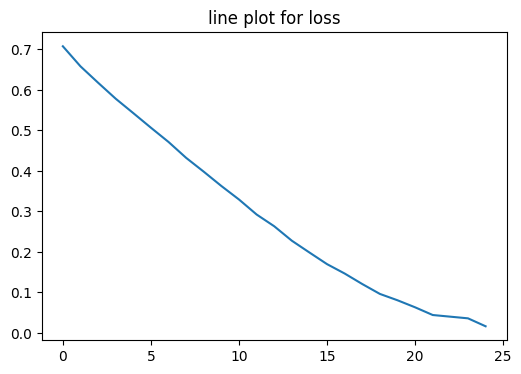

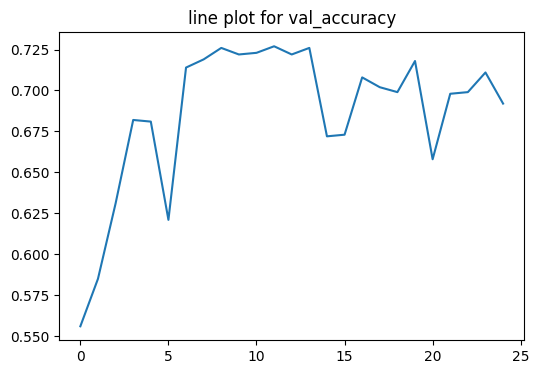

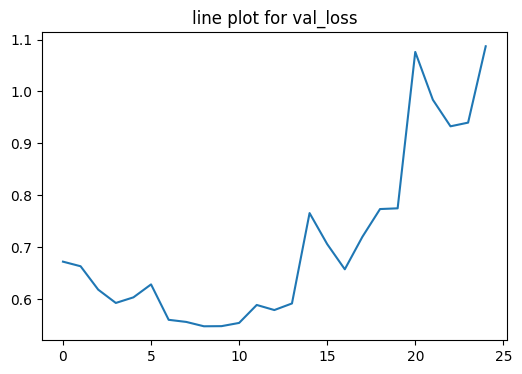

In [35]:
for k in train_model.history.keys():
  plt.figure(figsize=(6,4))
  sns.lineplot(x = range(25), y = modhist[k])
  plt.title(f'line plot for {k}')


In [39]:
train_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)

train_generator =train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(64, input_shape = [150,150,3], kernel_size= (3,3), activation= 'relu'),
                               tf.keras.layers.MaxPool2D(pool_size = (2,2)),


                               tf.keras.layers.Conv2D(128, kernel_size= (3,3), activation= 'relu'),
                               tf.keras.layers.MaxPool2D(pool_size = (2,2)),

                               tf.keras.layers.Dropout(0.5),

                               tf.keras.layers.Flatten(),

                               tf.keras.layers.Dense(256, activation= 'relu'),

                               tf.keras.layers.Dense(1, activation= 'sigmoid')

                               ])



model_2.summary()

model_2.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate = 1e-4), metrics = ['accuracy'])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 165888)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │      42,467,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,543,489 (162.29 MB)

 Trainable params: 42,543,489 (162.29 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
train_model_aug = model_2.fit(
      train_generator,
      steps_per_epoch= 80,  # 2000 images = batch_size * steps_per_epoch
      epochs= 25,
      validation_data=validation_generator,
      validation_steps=40 ,  # 1000 images = batch_size * steps_per_epoch
      verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [46]:
train_model_aug.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<ipython-input-47-11dd33a8c9be>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
<ipython-input-47-11dd33a8c9be>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
<ipython-input-47-11dd33a8c9be>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
<ipython-input-47-11dd33a8c9be>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0

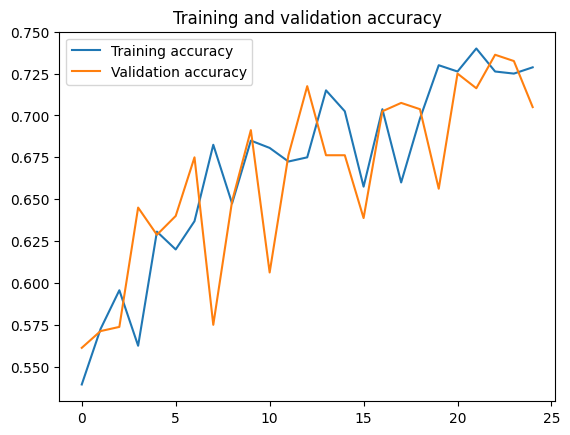

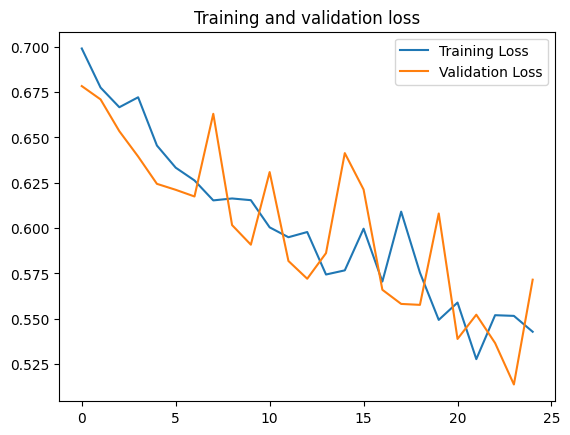

In [47]:
import matplotlib.pyplot as plt
acc = train_model_aug.history['accuracy']
val_acc = train_model_aug.history['val_accuracy']
loss = train_model_aug.history['loss']
val_loss = train_model_aug.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color ='tab:orange')
plt.title('Training and validation loss')
plt.legend()

plt.show()